
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**



---

# Análisis y visualización de datos - Parte 1

Grupo 15:
- Fassi, Carolina Noelia.
- Fassi, Angel Maximiliano.

In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn
seaborn.set_context('talk')

import warnings
warnings.filterwarnings('ignore')

## Lectura del dataset

In [ ]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


In [ ]:
# Visualizamos las columnas disponibles
df.columns.values.tolist()

['profile_gender',
 'profile_age',
 'work_country',
 'work_province',
 'profile_years_experience',
 'work_years_in_company',
 'work_years_in_current_position',
 'work_people_in_charge_of',
 'profile_studies_level',
 'profile_studies_level_state',
 'profile_career',
 'profile_university',
 'profile_specialization_courses',
 'profile_open_source_contributions',
 'profile_programming_as_hobby',
 'work_role',
 'tools_platform',
 'tools_programming_languages',
 'tools_frameworks',
 'tools_data_bases',
 'tools_qa_testing',
 'tools_IDEs',
 'tools_work_pc_os',
 'tools_cellphone_os',
 'work_on_call_duty',
 'salary_on_call_duty_charge',
 'work_on_call_duty_charge_type',
 'work_contract_type',
 'salary_monthly_BRUTO',
 'salary_monthly_NETO',
 'salary_in_usd',
 'salary_satisfaction',
 'salary_comparison_last_semester',
 'salary_has_bonus',
 'salary_bonus_tied_to',
 'salary_inflation_adjustment_2020',
 'salary_percentage_inflation_adjustment_2020',
 'salary_month_last_inflation_adjustment',
 'work_

# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

In [ ]:
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO']

### Conteo de frecuencias de los lenguajes de programación

La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.



In [ ]:
df.tools_programming_languages[:10]

0                                              Ninguno
1                             HTML, Javascript, Python
2                                              Ninguno
3    Bash/Shell, C, CSS, HTML, Java, Javascript, PH...
4               CSS, HTML, Javascript, SQL, TypeScript
5                                     Java, Javascript
6                                           Javascript
7                                     Java, Javascript
8                          Javascript, PHP, TypeScript
9              Assembler, Bash/Shell, C, C#, Python, R
Name: tools_programming_languages, dtype: object

Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.

In [ ]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df.loc[:, 'cured_programming_languages'] = df.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages
0,ninguno,Ninguno,43000.0,[ninguno]
1,html,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
2,ninguno,Ninguno,127000.0,[ninguno]


En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

In [ ]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count[:15]

,language,frequency
0,javascript,2513
1,sql,2154
2,html,1861
3,python,1475
4,java,1453
5,css,1247
6,bash/shell,993
7,php,891
8,.net,823
9,typescript,779


## Filtrado de lenguajes relevantes

Tomamos los primeros 11, ya que a partir del 12 la frecuencia de los resetantes lenguajes cae a la mitad de manera abrupta, siendo además la opcion más elegida dentro de este subgrupo de lenguajes menos frecuentes *ninguno*.

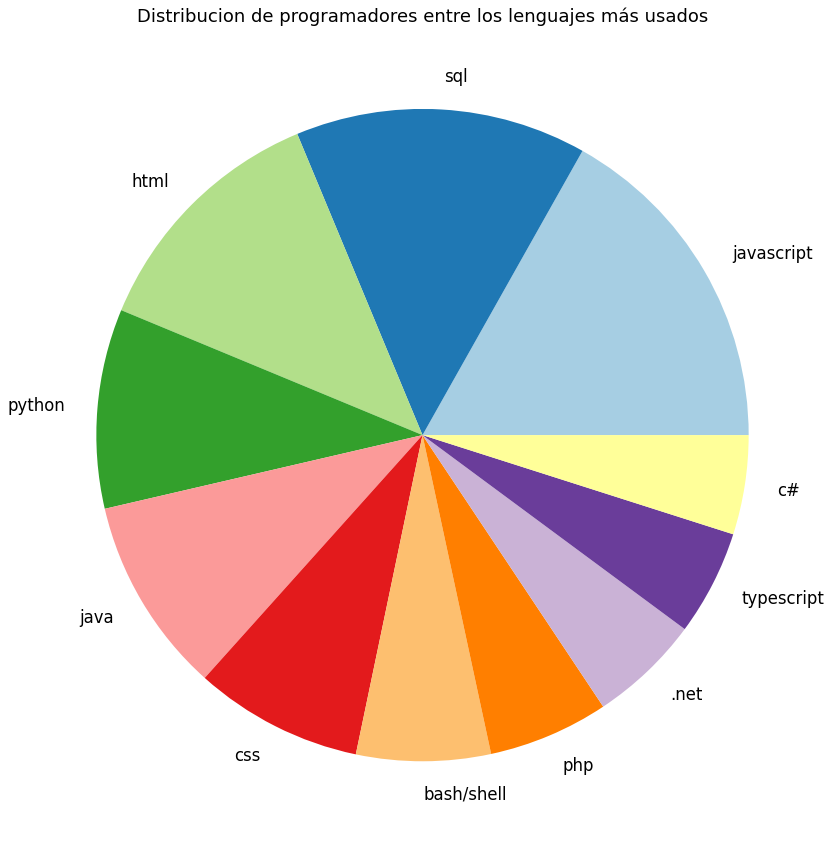

In [ ]:
# Filtrado de Lenguajes
relevant_languages = language_count[:11].language # Tomamos los lenguajes mas utilizados para el analisis
filtered_df_lang = df_lang[df_lang.programming_language.isin(relevant_languages )]
language_count_2 = filtered_df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
#seaborn.barplot(x=language_count_2["language"], y=language_count_2['frequency'])

#Grafico de los salarios correspondientes a los lenguajes de programacion mas populares
seaborn.set_palette('Paired')
fig = plt.figure(figsize=(15,15))
label= language_count_2 ["language"]
plt.pie(x= language_count_2 ["frequency"], labels=label)
plt.title ("Distribucion de programadores entre los lenguajes más usados")
plt.show()

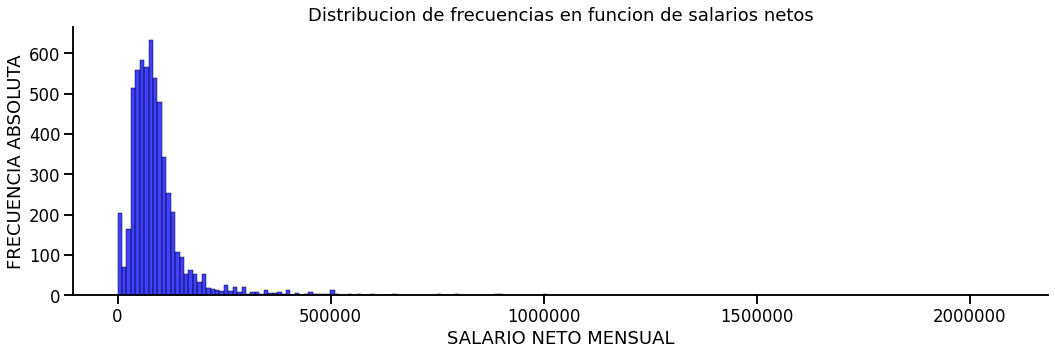

In [ ]:
salary_col = 'salary_monthly_NETO'
seaborn.displot(df.salary_monthly_NETO, aspect=3, bins=200, color='b')
plt.ticklabel_format(style='plain', axis='x')
plt.title ("Distribucion de frecuencias en funcion de salarios netos")
plt.xlabel("SALARIO NETO MENSUAL")
plt.ylabel("FRECUENCIA ABSOLUTA")
plt.show()

Graficamente podemos ver que la gran mayoria de los datos estan acumulados en el intervalo [0:500000], los intervalos a partir de ese valor y hasta 2 millones tienen frecuencia practicamente nula.

In [ ]:
# Analizamos estadisticamente la columna de Salario Neto
print(f"median \t{df_lang.salary_monthly_NETO.median()}")
print(df_lang.salary_monthly_NETO.describe().apply(lambda s: '{0:.2f}'.format(s)))

median 	80000.0
count      17353.00
mean      100210.00
std       104789.20
min            1.00
25%        54000.00
50%        80000.00
75%       110000.00
max      2080000.00
Name: salary_monthly_NETO, dtype: object


In [ ]:
#Limpiamos el df
df_limpio =  df_lang[df_lang[salary_col] < 500000]
df_limpio =  df_limpio[df_limpio[salary_col] > 18900] #SMVM 10/2020
df_limpio =  df_limpio[df_limpio.programming_language.isin(relevant_languages)]
print(f"median {df_limpio.salary_monthly_NETO.median()}")
print(df_limpio.salary_monthly_NETO.describe().apply(lambda s: '{0:.2f}'.format(s)))

median 80000.0
count     13671.00
mean      95470.13
std       65238.92
min       19000.00
25%       56000.00
50%       80000.00
75%      110000.00
max      490000.00
Name: salary_monthly_NETO, dtype: object


Eliminamos aquellos valores superiores $500000 ya que son muy pocos en cuanto a frecuencia pero alteran mucho los promedios, y tambien eliminamos todos aquellos valores que se encuentren por debajo del SMVM, ya que nos parece que nadie contrataria por debajo de ese valor. Sin embargo hay un gran numero de registros que tienen valores por debajo, lo que adjudicamos a errores en la carga de datos, conversiones de moneda o simplemente encuestados que no querian brindar esta informacion. 

Luego de realizar esta eliminacion de registros, vemos que la media se redujo ligeramente y la mediana no se modifico, pero si logramos reducir la dispersion en los datos al 50%.

<Figure size 2304x1296 with 0 Axes>

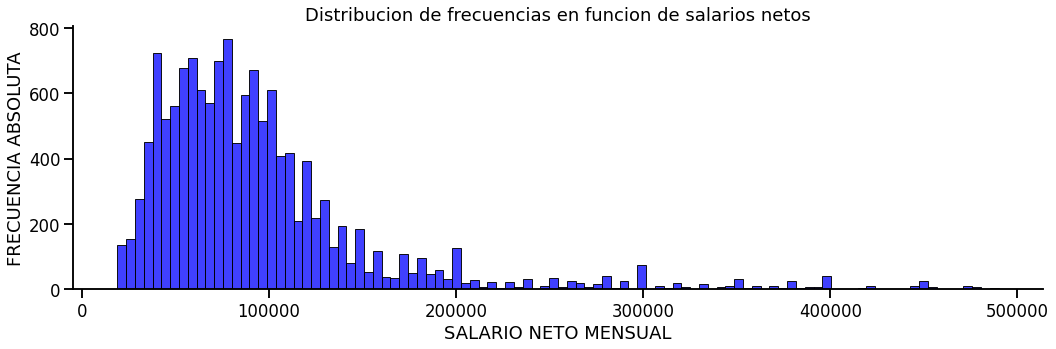

In [ ]:
# Grafico de frecuencias del dataset acotado
fig = plt.figure(figsize=(32,18))
seaborn.displot(df_limpio[salary_col], aspect=3, bins=100, color='b')
plt.title ("Distribucion de frecuencias en funcion de salarios netos")
plt.xlabel("SALARIO NETO MENSUAL")
plt.ylabel("FRECUENCIA ABSOLUTA")
plt.show()

In [ ]:
# medidas de tendencia central (Media, Mediana y Variacion Estándar) segun cada lenguaje de programacion de la lista de los mas populares
central_tendency = [
    (relevant_lang, df_limpio[df_limpio["programming_language"] == relevant_lang][salary_col].mean(),
     df_limpio[df_limpio["programming_language"] == relevant_lang][salary_col].median(),
    df_limpio[df_limpio["programming_language"] == relevant_lang][salary_col].std())
    for relevant_lang in relevant_languages
]

In [ ]:
central_tendency_df = pd.DataFrame(central_tendency,
                                   columns=['programming_language', 'mean', 'median', 'std']).sort_values(by='mean')

central_tendency_df

,programming_language,mean,median,std
5,css,88710.931461,74655.0,63104.952964
2,html,90264.041004,75000.0,65222.945884
1,sql,90710.628893,79000.0,60143.717972
7,php,91233.623901,75950.0,64108.171919
8,.net,93128.144570,80000.0,64605.060754
10,c#,93302.131409,78000.0,68378.983344
0,javascript,96360.964249,80000.0,68201.425481
4,java,99139.508820,89000.0,58910.772446
6,bash/shell,102242.341381,90000.0,64363.854990
9,typescript,104466.287907,86000.0,74535.730518


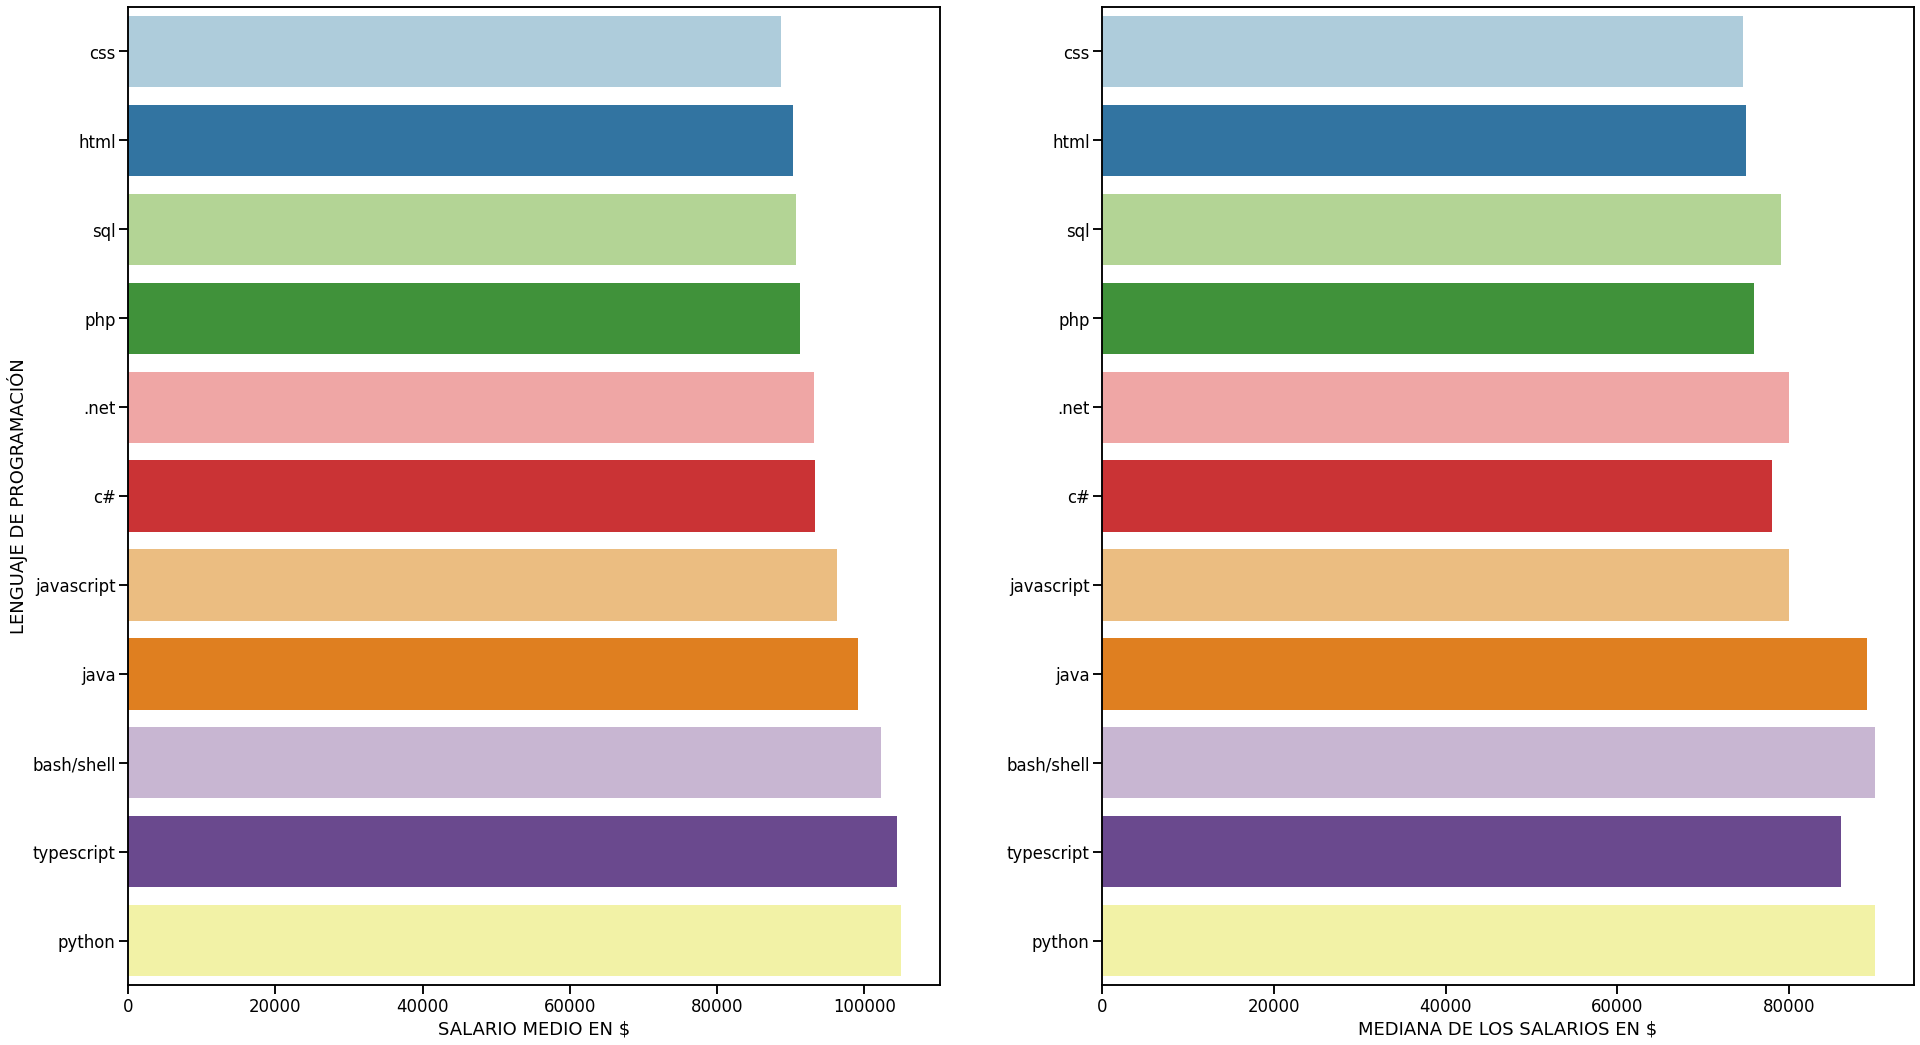

In [ ]:
# graficos de las medias y medianas de los salarios de los 10 lenguajes de programacion mas populares.
fig = plt.figure(figsize=(32,18))
plt.subplot(121)
seaborn.barplot(x=central_tendency_df["mean"], y=central_tendency_df["programming_language"])
plt.ylabel("LENGUAJE DE PROGRAMACIÓN")
plt.xlabel("SALARIO MEDIO EN $")

plt.subplot(122)
seaborn.barplot(x=central_tendency_df["median"], y=central_tendency_df["programming_language"])
plt.ylabel(" ")
plt.xlabel("MEDIANA DE LOS SALARIOS EN $")

plt.show()

Text(0.5, 0, 'LENGUAJE DE PROGRAMACIÓN')

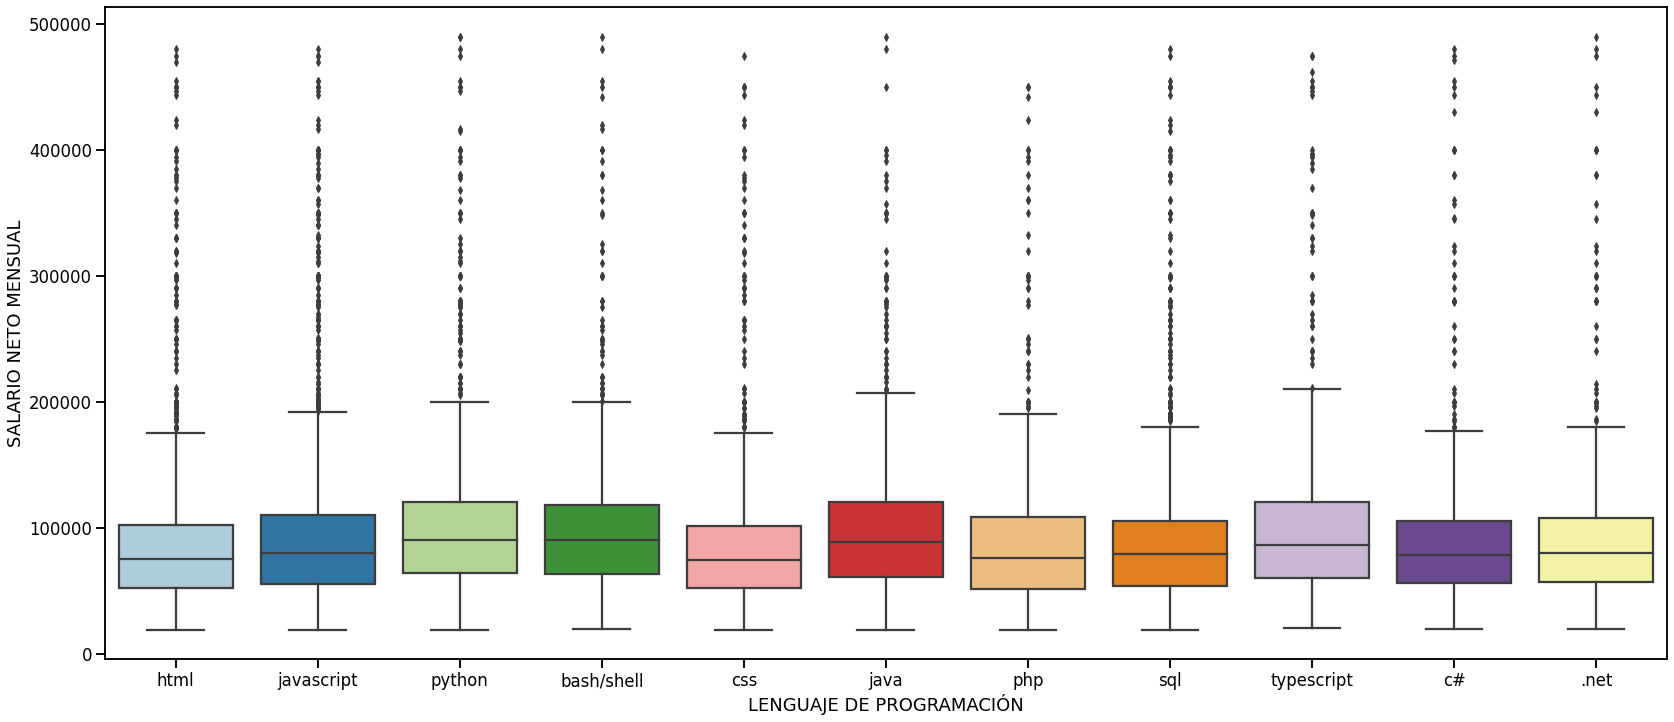

In [ ]:
fig = plt.figure(figsize=(28,12))
seaborn.boxplot(x="programming_language", y="salary_monthly_NETO", data=df_limpio)
plt.ylabel("SALARIO NETO MENSUAL")
plt.xlabel("LENGUAJE DE PROGRAMACIÓN")

Las medidas de tendencia central en los lenguajes analizados son muy similares, los 5 primeros, cuentan con un mínima variación alrededor del valor de 90.000 para la mediana y en 100.000 para la media.
El hecho de que la media sea mayor que la mediana indica la presencia de una ligera asimetria hacia los valores grandes.

### **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

A partir del analisis realizado sobre la distribución del Salario Neto Mensual en los lenguajes de programación mas usados, evidenciamos que los mejores salarios están asociados a los siguientes lenguajes: Python, bash/shell, java, typescript y javascript. 

En general para estos lenguajes las medias y medianas los colocan en la misma posicion, salvo el caso de Typescript donde su media es practicamente igual a la de python y su mediana es significativamente menor, algo que adjudicamos a la dispersion de su conjunto de datos, ya que su desvio es bastante mas alto que el resto.

# Ejercicio 2 - Densidades y varias variables

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




In [ ]:
#Columnas elegidas para analizar:
salary_col = 'salary_monthly_NETO' # numerica
age_col = 'profile_age' # numerica
year_exp_col = 'profile_years_experience' # numerica
salary_satisfaction_col = 'salary_satisfaction' # categorica
work_contract_type = 'work_contract_type' # categorica

df =  df[df[salary_col] < 500000]
df =  df[df[salary_col] > 18900] #SMVM 10/2020


A continuacion realizamos distintas visualizaciones para observar su comportamiento:

<Figure size 1440x720 with 0 Axes>

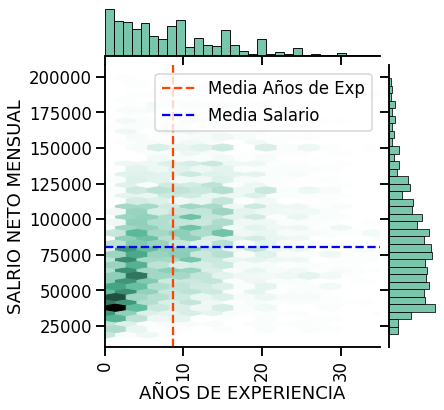

In [ ]:
max_salary = 200000 #Pusimos ese valor porque No afecta demasiado dada la distribucion de los datos y ayuda a la visualizacion.
fig = plt.figure(figsize=(20,10))
seaborn.jointplot(data=df[df.salary_monthly_NETO< max_salary], x='profile_years_experience',
                  y='salary_monthly_NETO', kind='hex', height=6, xlim=(0,35), color="#4CB391")
plt.axvline(df[df.salary_monthly_NETO < max_salary]['profile_years_experience'].mean(), color='orangered',
            linestyle='--', label='Media Años de Exp')
plt.axhline(df[df.salary_monthly_NETO < max_salary]['salary_monthly_NETO'].mean(), color='blue',
            linestyle='--', label='Media Salario')
plt.legend()
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
plt.xlabel("AÑOS DE EXPERIENCIA")
plt.ylabel("SALRIO NETO MENSUAL")

plt.show()

En el gráfico se visualiza que la mayor parte de los encuestados cuenta con menos de 10 años de experiencia, y a diferencia del salario que parece presentar una distribución tendiente a una normal centrada en la media, los años de experiencia tienen una distribución completamente asimétrica.

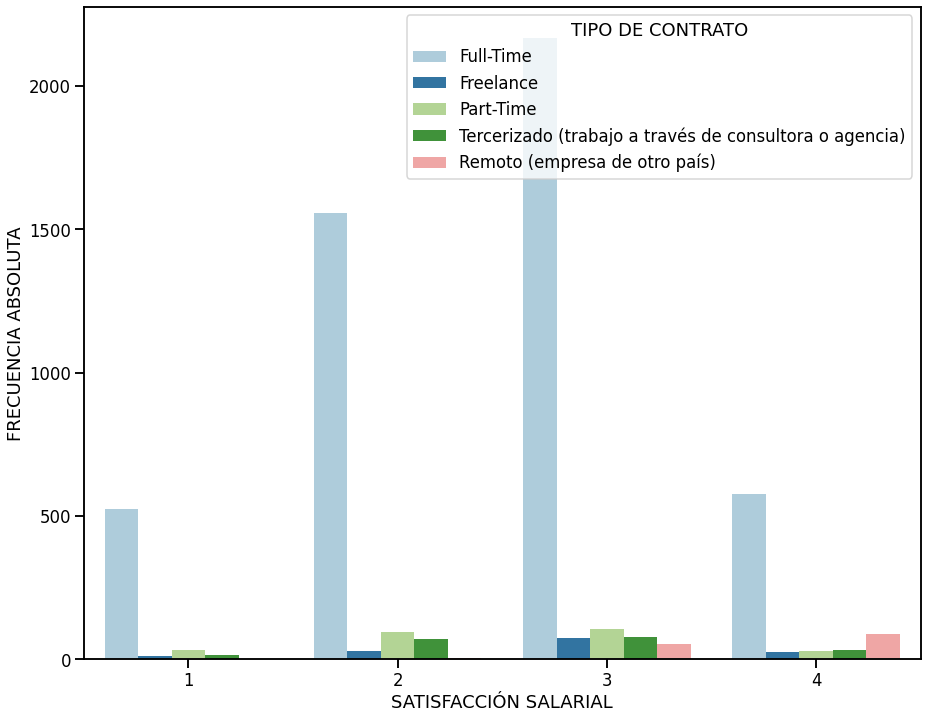

In [ ]:
fig = plt.figure(figsize=(15,12))
seaborn.countplot(df.salary_satisfaction,  hue=df.work_contract_type,)

plt.xlabel("SATISFACCIÓN SALARIAL")
plt.ylabel("FRECUENCIA ABSOLUTA")
plt.legend(title="TIPO DE CONTRATO")

plt.show()

En la gráfica se visualiza que los encuestados con trabajo remoto son los únicos con una tendencia marcada a tener una satisfacción salarial alta, mientras que las demás categorias se encuentran distribuidas en todos los niveles de satisfacción.

5572
5206
0.9343144292893036


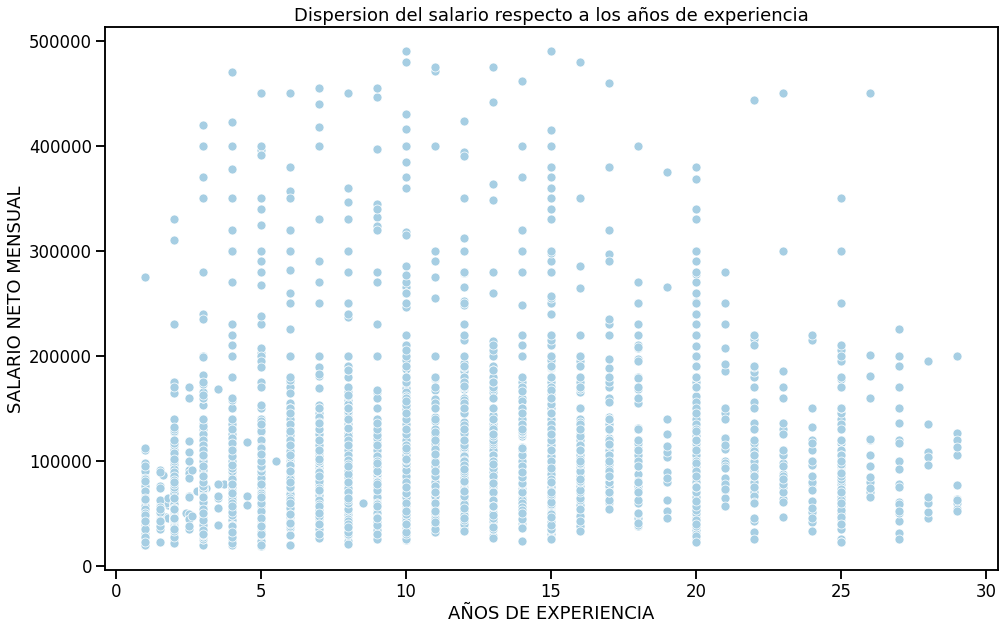

In [ ]:
plt.figure(figsize=(16,10))
max_age = 100
max_year_exp = 30
df_year_exp_salary = df[(df.profile_age < max_age) & (df.profile_years_experience < max_year_exp) & (df.profile_years_experience > 0)]
seaborn.scatterplot(data=df_year_exp_salary,
                    x=year_exp_col, y=salary_col,)
plt.ticklabel_format(style='plain', axis='y')
print(df.salary_monthly_NETO.count())
print(df_year_exp_salary[df_year_exp_salary.salary_monthly_NETO < 500000].salary_monthly_NETO.count())
print(df_year_exp_salary[df_year_exp_salary.salary_monthly_NETO < 500000].salary_monthly_NETO.count() / df.salary_monthly_NETO.count())
plt.xlabel("AÑOS DE EXPERIENCIA")
plt.ylabel("SALARIO NETO MENSUAL")
plt.title('Dispersion del salario respecto a los años de experiencia')
plt.show()

No parece existir una relacion directa entre los años de experiencia y el salario, los valores mas altos, se encuentran principalmente en la zona media, entre los 5 y 15 años de experiencia, aprox.

Pero es interesante destacar que existen más casos de salario alto en personas con menos de 5 años de experiencia que los que hay en los que tienen más de 20 años.
Esto puede atribuirse al hecho de que esas personas si bien acumulan mucha experiencia, pueden haberse especializado en lenguajes de programación que hoy en día no son tan demandados.

### Considerando:
*   Edad máxima: 100 años
*   Cantidad años experiencia: 30 años
*   Salario máximo: 200.000 pesos argentinos









Total: 5572
Cantidad menor a 200000: 3505
Considerando un salario máximo de 100000 pesos argentinos el 62.90380473797559% es menor a 1000000 pesos argentinos


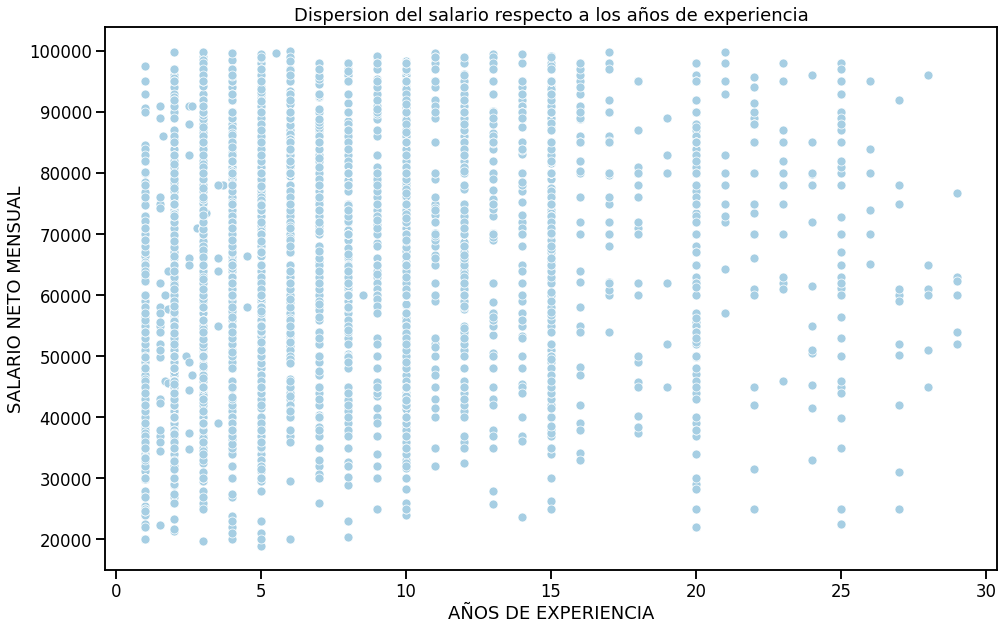

In [ ]:
plt.figure(figsize=(16,10))
max_salary = 100000
df_year_exp_salary = df_year_exp_salary[df_year_exp_salary.salary_monthly_NETO < max_salary]
seaborn.scatterplot(data=df_year_exp_salary,
                    x=year_exp_col, y=salary_col,)
plt.ticklabel_format(style='plain', axis='y')
print(f"Total: {df.salary_monthly_NETO.count()}")
print(f"Cantidad menor a 200000: {df_year_exp_salary[df_year_exp_salary.salary_monthly_NETO < 200000].salary_monthly_NETO.count()}")
less_than_200000 = (df_year_exp_salary[df_year_exp_salary.salary_monthly_NETO < 200000].salary_monthly_NETO.count() / df.salary_monthly_NETO.count()) * 100
print(f"Considerando un salario máximo de 100000 pesos argentinos el {less_than_200000}% es menor a 1000000 pesos argentinos")
plt.xlabel("AÑOS DE EXPERIENCIA")
plt.ylabel("SALARIO NETO MENSUAL")
plt.title('Dispersion del salario respecto a los años de experiencia')
plt.show()

Analizando la misma dispersion pero en una escala mas acotada del salario, donde aun se incluyen la mayoria de los datos, Podemos concluir que un incremento en los años de experiencia no se traduce en un aumento del salario, pero si se puede observar la formacion de un piso de salario a partir de los 10 años de experiencia (por encima de los $20000, un 15% por encima del SMVM), aunque se trata de un piso muy bajo en relacion a los salarios promedios del sector.

## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



In [ ]:
df_limpio =  df[df['salary_monthly_NETO'] < 500000]
df_limpio =  df_limpio[df_limpio['salary_monthly_NETO'] > 18900]

#percentil
k = 90

#salarios NETOS
percentile_k_N = df_limpio['salary_monthly_NETO'].quantile(k / 100)
n_below_N = df_limpio['salary_monthly_NETO'] < percentile_k_N
n_above_N = df_limpio['salary_monthly_NETO'] >= percentile_k_N
print('Percentil {} de la columna {}: {}'.format(k, 'salary_monthly_NETO', percentile_k_N))
print('% de datos SNETO menor que percentil {}: {}'.format(k, len(df_limpio[n_below_N]) / len(df_limpio)))
print('% de datos SNETO mayor que percentil {}: {}'.format(k, len(df_limpio[n_above_N]) / len(df_limpio)))

#salarios Brutos
percentile_k_B = df_limpio['salary_monthly_BRUTO'].quantile(k / 100)
n_below_B = df_limpio['salary_monthly_BRUTO'] < percentile_k_B
n_above_B = df_limpio['salary_monthly_BRUTO'] >= percentile_k_B
print('Percentil {} de la columna {}: {}'.format(k, 'salary_monthly_BRUTO', percentile_k_B))
print('% de datos SBRUTO menor que percentil {}: {}'.format(k, len(df_limpio[n_below_B]) / len(df_limpio)))
print('% de datos SBRUTO mayor que percentil {}: {}'.format(k, len(df_limpio[n_above_B]) / len(df_limpio)))


#Prob Conjunta

intersection_aa=len(df_limpio[n_above_N & n_above_B])/ len(df_limpio)
intersection_bb=len(df_limpio[n_below_N & n_below_B])/ len(df_limpio)
intersection_ab=len(df_limpio[n_above_N & n_below_B])/ len(df_limpio)
intersection_ba=len(df_limpio[n_below_N & n_above_B])/ len(df_limpio)
#n_y_y = len((df[(df['salary_monthly_BRUTO'] < percentile_k_B]) and (df['salary_monthly_NETO'] < percentile_k_N]))
#n_n_n = len((df[df['salary_monthly_BRUTO'] > percentile_k_B] and df['salary_monthly_NETO'] > percentile_k_N])

print('% de datos SBRUTO y SNETO menor que percentil {}: {}'.format(k, intersection_bb))
print('% de datos SBRUTO y SNETO mayor que percentil {}: {}'.format(k, intersection_aa))
print('% de datos SBRUTO menor que percentil y SNETO mayor {}: {}'.format(k, intersection_ab))
print('% de datos SBRUTO mayor que percentil y SNETO menor {}: {}'.format(k, intersection_ba))

Percentil 90 de la columna salary_monthly_NETO: 150000.0
% de datos SNETO menor que percentil 90: 0.8946518305814788
% de datos SNETO mayor que percentil 90: 0.10534816941852118
Percentil 90 de la columna salary_monthly_BRUTO: 205000.0
% de datos SBRUTO menor que percentil 90: 0.8991385498923188
% de datos SBRUTO mayor que percentil 90: 0.10086145010768126
% de datos SBRUTO y SNETO menor que percentil 90: 0.8815506101938263
% de datos SBRUTO y SNETO mayor que percentil 90: 0.08776022972002871
% de datos SBRUTO menor que percentil y SNETO mayor 90: 0.017587939698492462
% de datos SBRUTO mayor que percentil y SNETO menor 90: 0.01310122038765255


In [ ]:
d = [ ["NETO per k%", intersection_aa, intersection_ab, intersection_aa+intersection_ab],
     ["NETO noper k%", intersection_ba, intersection_bb, intersection_bb+intersection_ba],["margin", intersection_aa+intersection_ba, intersection_ab+intersection_bb, '1']]

tabla = pd.DataFrame(d, columns = [' ','BRUTO per. k%','BRUTO noper. k%', 'margin'])
print(tabla)

                  BRUTO per. k%  BRUTO noper. k%    margin
0    NETO per k%       0.087760         0.017588  0.105348
1  NETO noper k%       0.013101         0.881551  0.894652
2         margin       0.100861         0.899139         1


In [ ]:
Bpk=len(df_limpio[n_above_B]) / len(df_limpio)
Npk=len(df_limpio[n_above_N]) / len(df_limpio)
precision=0.01
BpkXNpk=(intersection_aa+intersection_ba)*(intersection_aa+intersection_ab)
print(BpkXNpk)
print(intersection_aa-BpkXNpk)

if abs(intersection_aa-BpkXNpk)<precision:
  print('La probabilidad de que el sueldo bruto y neto pertenescan al %.2f percentil coincide con el producto de la probabilidades individuales, luego podemos decir que los eventos son independientes')
else:
  print('Los eventos son dependientes')

0.010625569133741727
0.07713466058628698
Los eventos son dependientes


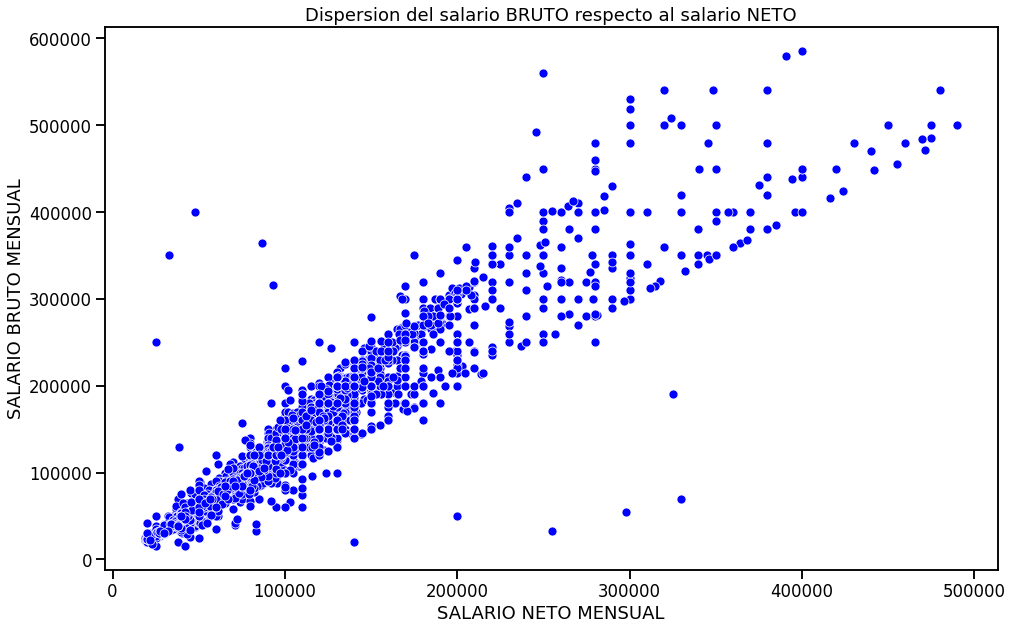

,salary_monthly_BRUTO,salary_monthly_NETO
salary_monthly_BRUTO,1.000000,0.949783
salary_monthly_NETO,0.949783,1.000000


In [ ]:
dfs=df_limpio[['salary_monthly_BRUTO', 'salary_monthly_NETO']]

plt.figure(figsize=(16,10))
max_salary_neto = 500000
max_salary_bruto = max_salary_neto * 1.2
min_salary_bruto = 18900 * 0.8
dfs = dfs[(dfs.salary_monthly_NETO < max_salary_neto) & (dfs.salary_monthly_BRUTO < max_salary_bruto)]
dfs = dfs[(dfs.salary_monthly_BRUTO > min_salary_bruto)]
seaborn.scatterplot(data=dfs,
                    x='salary_monthly_NETO', y='salary_monthly_BRUTO', color='b')
plt.xlabel("SALARIO NETO MENSUAL")
plt.ylabel("SALARIO BRUTO MENSUAL")
plt.title('Dispersion del salario BRUTO respecto al salario NETO')
plt.show()

dfs.corr()

Si, existe clara correlación entre el Salario Bruto y Salario Neto, comprobamos a traves de varios metodos la relacion existente entre ambas variables. 
Por lo tanto, la columna de Salario Bruto podria sacarse del Data Frame, ya que los valores que aporta, igual estarian reflejados en Salario Neto Mensual

## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






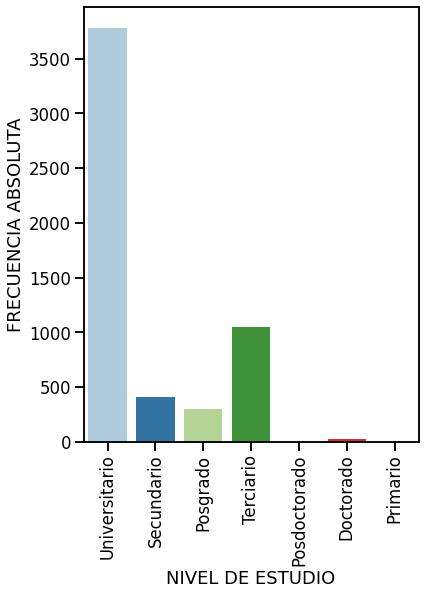

In [ ]:
df_limpio =  df[df['salary_monthly_NETO'] < 500000]
df_limpio =  df_limpio[df_limpio['salary_monthly_NETO'] > 18900]

fig = plt.figure(figsize=(6,8)) 
seaborn.countplot(df.profile_studies_level, )
plt.xticks(rotation=90)
plt.xlabel("NIVEL DE ESTUDIO")
plt.ylabel("FRECUENCIA ABSOLUTA")
plt.show()

En base al gráfico de frecuencias de los Nieveles de Estudio elegimos las dos subplobaciones más numerosas: Universitario y Terciario.

In [ ]:
studies_level_col = 'profile_studies_level'

uni=df_limpio["profile_studies_level"] == 'Universitario'
ter=df_limpio["profile_studies_level"] == 'Terciario'
groupA = df_limpio[uni].salary_monthly_NETO
groupB= df_limpio[ter].salary_monthly_NETO

df_UT=df_limpio[(df_limpio["profile_studies_level"] == 'Terciario') | (df_limpio["profile_studies_level"] == 'Universitario')]

In [ ]:
central_tendency_study_level = [
    (study_level, df_limpio[df_limpio["profile_studies_level"] == study_level][salary_col].mean(),
     df_limpio[df_limpio["profile_studies_level"] == study_level][salary_col].median(),
     df_limpio[df_limpio["profile_studies_level"] == study_level][salary_col].std(), 
     df_limpio[df_limpio["profile_studies_level"] == study_level][salary_col].count())
    for study_level in df_limpio[studies_level_col].unique()
]
central_tendency_df = pd.DataFrame(central_tendency_study_level,
                                    columns=['study_level', 'mean', 'median', 'std', 'count'])
 
#tomando universitario y terciario
central_tendency_df_cleaned = central_tendency_df[central_tendency_df["study_level"].isin(['Terciario', 'Universitario'])]
print(central_tendency_df_cleaned)

     study_level          mean   median           std  count
0  Universitario  93747.129107  80000.0  62042.779674   3784
3      Terciario  80757.256405  70000.0  51602.077049   1046


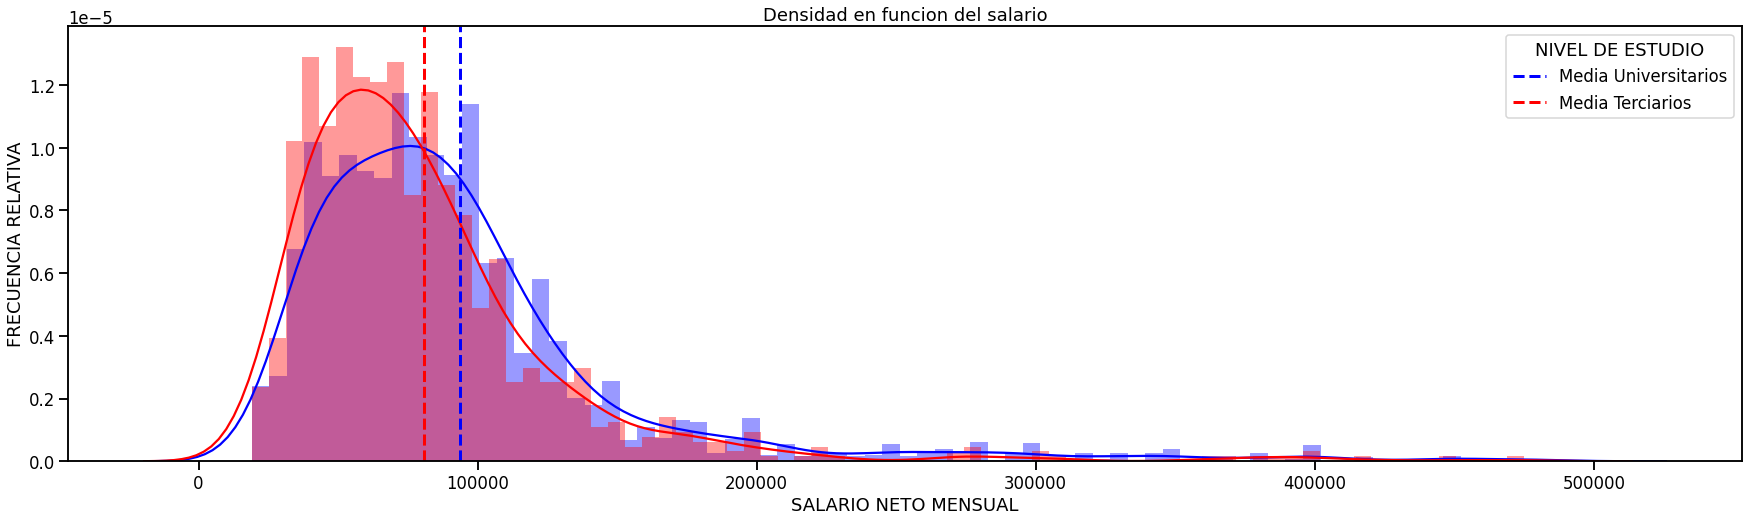

In [ ]:
plt.figure(figsize=(30, 8))
ax1 = seaborn.distplot(groupA, bins=75, color='b')
ax2 = seaborn.distplot(groupB, bins=75, color='r')
plt.axvline(numpy.mean(groupA), color='b', linestyle='dashed', linewidth=3, label='Media Universitarios')
plt.axvline(numpy.mean(groupB), color='r', linestyle='dashed', linewidth=3, label='Media Terciarios')
plt.legend(title="NIVEL DE ESTUDIO")
plt.xlabel("SALARIO NETO MENSUAL")
plt.ylabel("FRECUENCIA RELATIVA")
plt.title('Densidad en funcion del salario')
plt.show()

A partir de los graficos de densidad con los datos agrupados segun el criterio de nivel de estudio, se puede ver que existe un corrimiento hacia los valores inferiores para el nivel de estudio *Terciario*. 

Las medidas de tendencia central arrojan diferencias significativas (mayores al 10%) lo que nos lleva a pensar que las variables no son independientes.

In [ ]:
#Prueba de dependencia a traves de probabilidad conjunta.
k = 90
percentile_k_N = df_UT['salary_monthly_NETO'].quantile(k / 100)
percentile_k_B = df_UT['salary_monthly_NETO'].quantile(k / 100)


#salarios Terciario
n_below_N = ((df_UT["profile_studies_level"] == 'Terciario') & (df_UT['salary_monthly_NETO'] < percentile_k_B))
n_above_N = ((df_UT["profile_studies_level"] == 'Terciario') & (df_UT['salary_monthly_NETO'] >= percentile_k_B))

#salarios Universitario
n_below_B = (df_UT["profile_studies_level"] == 'Universitario') & (df_UT['salary_monthly_NETO'] < percentile_k_N)
n_above_B = (df_UT["profile_studies_level"] == 'Universitario') & (df_UT['salary_monthly_NETO'] >= percentile_k_N)

intersection_aa=len(df_UT[n_above_B])/ len(df_UT)
intersection_bb=len(df_UT[n_below_N])/ len(df_UT)
intersection_ab=len(df_UT[n_below_B])/ len(df_UT)
intersection_ba=len(df_UT[n_above_N])/ len(df_UT)

d = [ ['Universitario', intersection_aa, intersection_ab, intersection_aa+intersection_ab],
     ["Terciario", intersection_ba, intersection_bb, intersection_bb+intersection_ba],["margin", intersection_aa+intersection_ba, intersection_ab+intersection_bb, '1']]

tabla = pd.DataFrame(d, columns = [' ','per. k%','noper. k%', 'margin'])
print(tabla)

                  per. k%  noper. k%    margin
0  Universitario   0.0853   0.698137  0.783437
1      Terciario   0.0147   0.201863  0.216563
2         margin   0.1000   0.900000         1


In [ ]:
precision=0.01

BpkXNpk=(intersection_aa+intersection_ba)*(intersection_aa+intersection_ab)
BpkXNpk2=(intersection_aa+intersection_ba)*(intersection_ab+intersection_bb)

if abs(intersection_aa-BpkXNpk)<precision:
  if abs(intersection_ab-BpkXNpk2)<precision:
     print('La probabilidad de que el sueldo neto de universitarios y terciarios pertenescan al %.2f percentil coincide con el producto de la probabilidades individuales, luego podemos decir que los eventos son independientes')
  else:
    print('Los eventos son dependientes')
else:
  print('Los eventos son dependientes')

Los eventos son dependientes


Al analizar las medidas de tendencia central y la probabilidad conjunta de las variables, concluimos que el Nivel de Estudio y el Salario NO son Independientes.

## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)


In [ ]:
#Columnas elegidas para analizar:
salary_col = 'salary_monthly_NETO' # numerica
work_contract_type = 'work_contract_type' # categorica
salary_col_br = "salary_monthly_BRUTO" #numerica


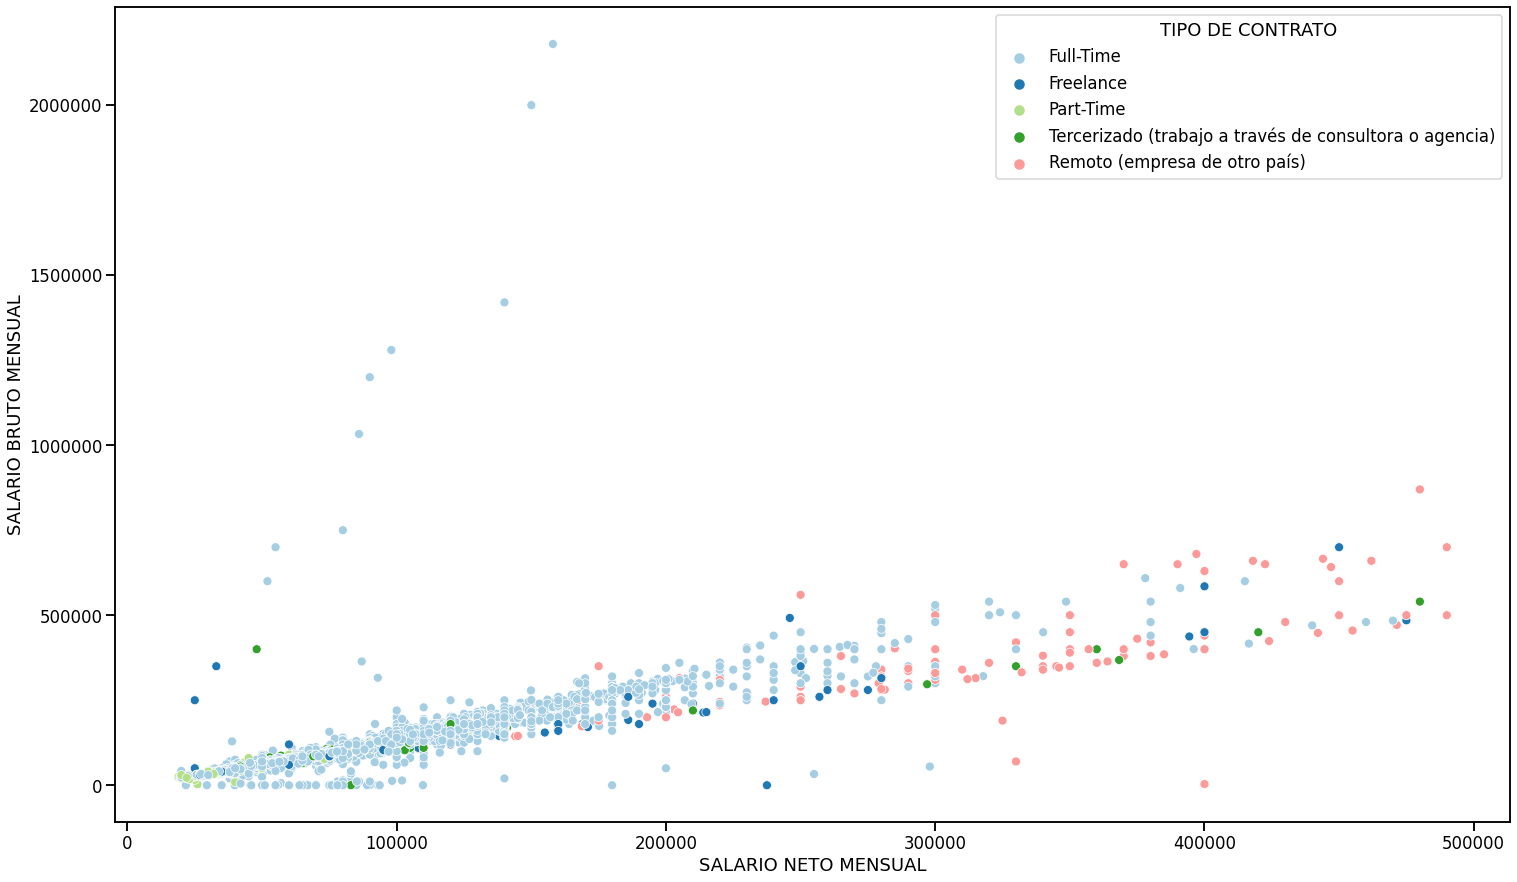

In [ ]:
plt.figure(figsize=(25,15))
df_cleaned = df[(df.profile_age < 100) & (df.profile_years_experience < 30)]
seaborn.scatterplot(data=df_cleaned,
                    x='salary_monthly_NETO', y='salary_monthly_BRUTO', hue='work_contract_type')
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel("SALARIO NETO MENSUAL")
plt.ylabel("SALARIO BRUTO MENSUAL")
plt.legend(title="TIPO DE CONTRATO")
plt.show()

Las variables elegidas presentan poca dispersión.
Los puntos correspondientes a Full-Time se encuentran mas concetrados por debajo de la media, mientras que los puntos de trabajo remoto, si bien son menos, se encuentran mas dispersos y corresponden a los salarios mas altos.

### ¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?

Para descubirir patrones y asocianes entre distintas variables son útiles principlamente las visualizaciones como Histogramas, Gráficos de Dispersion, Gráficos de Barra, etc.
En cuanto a las herramientas teóricas, son útiles las brindadas por la estadística descrptiva, como la media, mediana, desviación, etc. 
También el análisis de probabilidades condicionales, que es el mas claro con respecto a la relacion de dependencia entre las variables.